In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import first dataframe
df1 = pd.read_csv('precipitation.csv', parse_dates=['DATE'])

# Use the rename() method to change column name
df1.rename(columns={'DATE': 'Year'}, inplace=True)

#create a boolean mask to select only certain years
mask = (df1['Year'] >= '1961') & (df1['Year'] <= '2021')

df1 = df1[mask]

#import second dataframe
df2 = pd.read_csv('crops.csv', parse_dates=['Year'])

# Define a list of column names with NaN values
columns_with_nan = ['Unit', 'Value']

# Drop rows with NaN values only in the specified columns
df2 = df2.dropna(subset=columns_with_nan)

In [3]:
#merge both dataframes
df3 = df1.merge(df2, on='Year', how='outer')

In [4]:
# Define a list of column names to drop
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Year Code','Flag', 'Flag Description', 'Note', 'ELEVATION']

# Use the drop() method on the DataFrame, passing in the columns parameter with the list of column names
df3.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
#set object type as categories
df3[['STATION','NAME', 'Item','Unit']] = df3[['STATION','NAME', 'Item','Unit']].astype('category')

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14894 entries, 0 to 14893
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    14860 non-null  category      
 1   NAME       14860 non-null  category      
 2   LATITUDE   14860 non-null  float64       
 3   LONGITUDE  14860 non-null  float64       
 4   Year       14894 non-null  datetime64[ns]
 5   PRCP       13805 non-null  float64       
 6   TAVG       5638 non-null   float64       
 7   TMAX       5638 non-null   float64       
 8   TMIN       6731 non-null   float64       
 9   Item       14894 non-null  category      
 10  Unit       14894 non-null  category      
 11  Value      14894 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(7)
memory usage: 992.0 KB


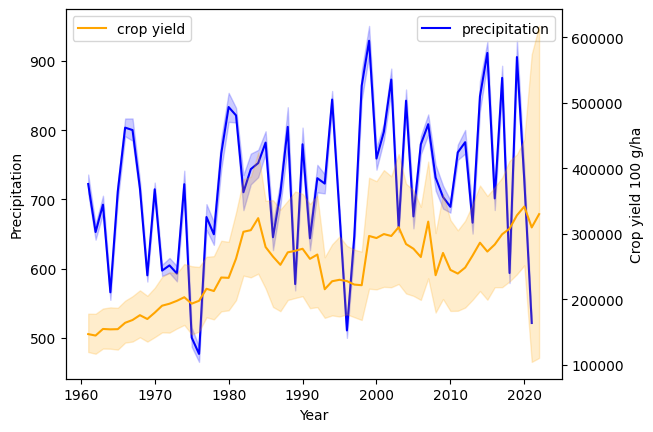

In [7]:
#plot precipiation and crop yield together throughout the years
ax1 = sns.lineplot(x='Year', y='PRCP', data=df3, color='blue', label='precipitation')

# Create a twin axis
ax2 = ax1.twinx()

sns.lineplot(x='Year', y='Value', data=df3, ax=ax2, color='orange', label='crop yield')

ax1.set_ylabel('Precipitation')
ax2.set_ylabel('Crop yield 100 g/ha')

plt.legend(loc='upper left')

In [8]:
#select only columns I want
df4 = df3[['Year', 'Value','PRCP']]

In [9]:
df5 = df4.groupby(['Year'], observed=False)[['Value', 'PRCP']].agg('mean')

df6 = df5.reset_index(drop=False)

In [10]:
#drop null values and change year to datetime
df6.dropna(inplace=True)

In [11]:
df6['Year'] = df6['Year'].dt.year

Is there a correlation between precipitation and crop yield?

<Axes: xlabel='PRCP', ylabel='Value'>

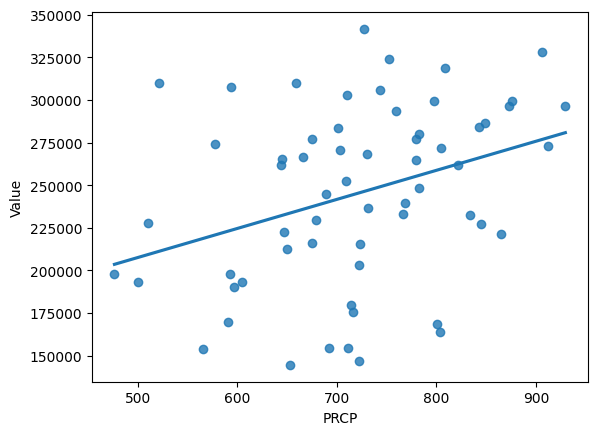

In [26]:
sns.regplot(data=df6, x='PRCP', y='Value', ci=None)

In [13]:
from scipy.stats import spearmanr, pearsonr

# Calculate Spearman correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(df6['PRCP'], df6['Value'])

print("Spearman correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Check if the correlation is statistically significant (a significance level of 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Spearman correlation coefficient: 0.3436805922792173
p-value: 0.006691026686903479
The correlation is statistically significant.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
#define X variable
X = df6.drop('Value', axis=1)
X.shape

(61, 2)

In [16]:
#define y variable
y = df6['Value']
y.shape

(61,)

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Fit a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Evaluate the model performance using the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7670867265588323


In [27]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 27163.520509118407
